**Importation des bibliothèques**

In [45]:
# Importation des bibliothèques essentielles
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Analyse exploratoire des données (EDA)**

**Chargement du dataset**

In [46]:
df = pd.read_csv("Advertising Budget and Sales.csv")

In [47]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [48]:
df.shape

(200, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [50]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


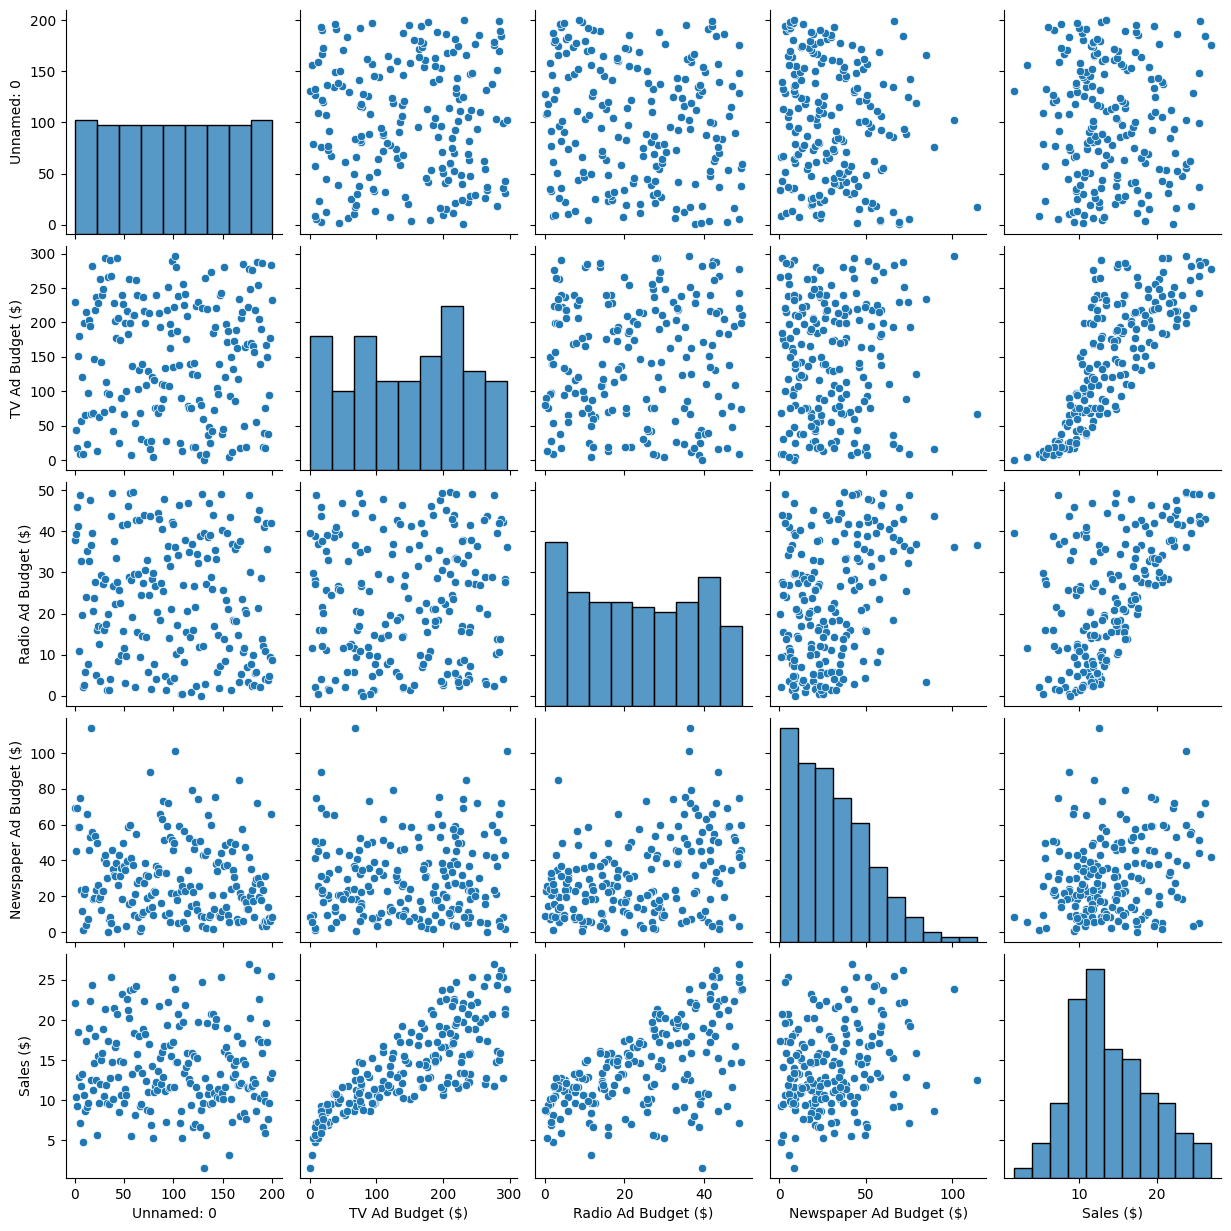

In [51]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

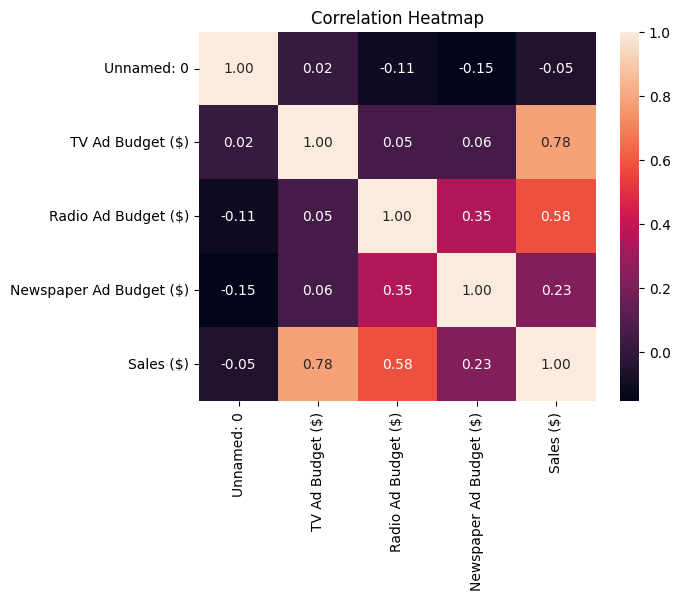

In [52]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f")
plt.title("Correlation Heatmap")

# **Prétraitement des données**

In [53]:
# Renommer les colonnes pour supprimer les caractères spéciaux
df.columns = df.columns.str.replace(r"[^a-zA-Z0-9_]", "", regex=True)
print(df.columns)


Index(['Unnamed0', 'TVAdBudget', 'RadioAdBudget', 'NewspaperAdBudget',
       'Sales'],
      dtype='object')


In [54]:
df.duplicated().sum()

0

In [55]:
df.isnull().sum()

,0
Unnamed0,0
TVAdBudget,0
RadioAdBudget,0
NewspaperAdBudget,0
Sales,0


In [56]:
# Standardisation des données
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Sales'])), columns=df.columns[:-1])
df_scaled['Sales'] = df['Sales']

print("\nDonnées après standardisation :")
print(df_scaled)


Données après standardisation :
     Unnamed0  TVAdBudget  RadioAdBudget  NewspaperAdBudget  Sales
0   -1.723412    0.969852       0.981522           1.778945   22.1
1   -1.706091   -1.197376       1.082808           0.669579   10.4
2   -1.688771   -1.516155       1.528463           1.783549    9.3
3   -1.671450    0.052050       1.217855           1.286405   18.5
4   -1.654129    0.394182      -0.841614           1.281802   12.9
..        ...         ...            ...                ...    ...
195  1.654129   -1.270941      -1.321031          -0.771217    7.6
196  1.671450   -0.617035      -1.240003          -1.033598    9.7
197  1.688771    0.349810      -0.942899          -1.111852   12.8
198  1.706091    1.594565       1.265121           1.640850   25.5
199  1.723412    0.993206      -0.990165          -1.005979   13.4

[200 rows x 5 columns]


**Séparation des données**

In [57]:
# Séparation des données après standardisation (Pour les modèles SVR et KNN)
X_scaled = df_scaled.drop(columns=['Sales'])
y_scaled = df_scaled['Sales']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [58]:
# Séparation des données sans standardisation
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modélisation et Comparaison des Modèles**

## **Modélisation des modèles**

In [59]:
# Régression Linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [60]:
# Decision tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [61]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [62]:
# SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)

In [63]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

In [64]:
# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

## **Comparaison des résultats**

In [65]:
#Evaluation du modèle Régression Linéaire
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
np.sqrt(mean_squared_error(y_pred_linear, y_test))
r2_linear = r2_score(y_test, y_pred_linear)
linear_accuracy = int(r2_linear * 100)

In [66]:
#Evaluation du modèle Decision tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
np.sqrt(mean_squared_error(y_pred_dt, y_test))
r2_dt = r2_score(y_test, y_pred_dt)
dt_accuracy = int(r2_dt * 100)

In [67]:
#Evaluation du modèle Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
np.sqrt(mean_squared_error(y_pred_rf, y_test))
r2_rf = r2_score(y_test, y_pred_rf)
rf_accuracy = int(r2_rf * 100)

In [68]:
#Evaluation du modèle SVR
mae_svr = mean_absolute_error(y_test_scaled, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr))
np.sqrt(mean_squared_error(y_pred_svr, y_test_scaled))
r2_svr = r2_score(y_test_scaled, y_pred_svr)
svr_accuracy = int(r2_svr * 100)

In [69]:
#Evaluation du modèle K-Nearest Neighbors (KNN)
mae_knn = mean_absolute_error(y_test_scaled, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test_scaled, y_pred_knn))
np.sqrt(mean_squared_error(y_pred_knn, y_test_scaled))
r2_knn = r2_score(y_test_scaled, y_pred_knn)
knn_accuracy = int(r2_knn * 100)

In [70]:
#Evaluation du modèle XGBoost
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
np.sqrt(mean_squared_error(y_pred_xgboost, y_test))
r2_xgboost = r2_score(y_test, y_pred_xgboost)
xgboost_accuracy = int(r2_xgboost * 100)

In [71]:
# Créer un DataFrame pour afficher les résultats
results = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'XGBoost'],
    'MAE': [mae_linear, mae_dt, mae_rf, mae_svr, mae_knn, mae_xgboost],
    'RMSE': [rmse_linear, rmse_dt, rmse_rf, rmse_svr, rmse_knn, rmse_xgboost],
    'R2 Score': [r2_linear, r2_dt, r2_rf, r2_svr, r2_knn, r2_xgboost],
    'Accuracy (%)': [linear_accuracy, dt_accuracy, rf_accuracy, svr_accuracy, knn_accuracy, xgboost_accuracy]
})

In [72]:
results

,Modèle,MAE,RMSE,R2 Score,Accuracy (%)
0,Régression Linéaire,1.465060,1.788576,0.898649,89
1,Decision Tree,1.097500,1.550726,0.923813,92
2,Random Forest,0.681200,0.790750,0.980190,98
3,SVR,1.344332,1.860804,0.890298,89
4,KNN,1.447500,1.837539,0.893024,89
5,XGBoost,0.739928,0.932264,0.972465,97


In [73]:
# Trie du meilleur au pire modèle
results_df = results.sort_values(by="R2 Score", ascending=False)

# Sélection du meilleur modèle
best_model_name = results_df.iloc[0]['Modèle']

In [74]:
results_df

,Modèle,MAE,RMSE,R2 Score,Accuracy (%)
2,Random Forest,0.681200,0.790750,0.980190,98
5,XGBoost,0.739928,0.932264,0.972465,97
1,Decision Tree,1.097500,1.550726,0.923813,92
0,Régression Linéaire,1.465060,1.788576,0.898649,89
4,KNN,1.447500,1.837539,0.893024,89
3,SVR,1.344332,1.860804,0.890298,89


In [75]:
models = {
    "Régression Linéaire": linear_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVR": svr_model,
    "KNN": knn_model,
    "XGBoost": xgboost_model
}

best_model = models[best_model_name]

# Sauvegarde du meilleur modèle
joblib.dump(best_model, "best_model.pkl")

print(f"Le meilleur modèle est : {best_model_name}")

Le meilleur modèle est : Random Forest


#**Test de prédiction**

In [76]:
# Chargement du modèle sauvegardé
best_model = joblib.load("best_model.pkl")
print(f"Le modèle sauvegardé est : {best_model}")


Le modèle sauvegardé est : RandomForestRegressor()


In [77]:
# Prédiction sur les 5 premières lignes du test set
y_pred_test = best_model.predict(X_test[:5])

for i, pred in enumerate(y_pred_test):
    print(f"Exemple {i+1}: Vente prédite = {pred:.2f} $, Vente réelle = {y_test.iloc[i]:.2f} $")


Exemple 1: Vente prédite = 17.82 $, Vente réelle = 16.90 $
Exemple 2: Vente prédite = 21.81 $, Vente réelle = 22.40 $
Exemple 3: Vente prédite = 20.15 $, Vente réelle = 21.40 $
Exemple 4: Vente prédite = 6.36 $, Vente réelle = 7.30 $
Exemple 5: Vente prédite = 23.43 $, Vente réelle = 24.70 $


In [79]:
# Prédiction du modèle sur des données avec 5 lignes personnalisées
new_data = pd.DataFrame([
    [1, 200.0, 39.0, 66.8],
    [2, 150.0, 30.0, 50.0],
    [3, 300.0, 50.0, 80.0],
    [4, 120.0, 20.0, 30.0],
    [5, 250.0, 45.0, 70.0]
], columns=X.columns)

predicted_sales = best_model.predict(new_data)

# Affichage des résultats
for i, pred in enumerate(predicted_sales):
    print(f"Exemple {i+1}: Pour un budget TV: {new_data.iloc[i,1]}$, Radio: {new_data.iloc[i,2]}$, Newspaper: {new_data.iloc[i,3]}$, la vente prédite est de {pred:.2f} $")

Exemple 1: Pour un budget TV: 200.0$, Radio: 39.0$, Newspaper: 66.8$, la vente prédite est de 20.34 $
Exemple 2: Pour un budget TV: 150.0$, Radio: 30.0$, Newspaper: 50.0$, la vente prédite est de 16.81 $
Exemple 3: Pour un budget TV: 300.0$, Radio: 50.0$, Newspaper: 80.0$, la vente prédite est de 25.00 $
Exemple 4: Pour un budget TV: 120.0$, Radio: 20.0$, Newspaper: 30.0$, la vente prédite est de 13.24 $
Exemple 5: Pour un budget TV: 250.0$, Radio: 45.0$, Newspaper: 70.0$, la vente prédite est de 24.02 $
